# ICS 434: DATA SCIENCE FUNDAMENTALS

## Random Number Generation in Python and Common Plot Types

---

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (4.5, 3)

### Random Number Generation

* Data we will generate throughout the course is pseudorandom
  * Generated using an algorithm for generating seemingly random but still reproducible data
    
```They start with a random number, known as the seed, and then use an algorithm to generate a pseudo-random sequence of bits based on it. ```

* Should not be used for security purposes but is actually recommended for data science
  * Reproducibility if random sequencing is convenient in experiments

### Random Number Generation -- Cont'd

* Basic radnom functionality is implemented in the `random` standard library

* Many other sampling strategies (probability distributions) are implemented in `numpy`
  * The same functions available in `random` are also available in `numpy`, although generally with more options
  * `numpy` offer more strategies (beyond *uniform*)

### Random Number Generation -- Cont'd

* Basic radnom functionality is implemented in the `random` standard library

* Many other sampling strategies (probability distributions) are implemented in `numpy`
  * The same functions available in `random` are also available in `numpy`, although generally with more options
  * `numpy` offer more strategies

### (Pseudo)-Random Number Generation and Seeds

* The seed and the strategy determine the sequence of randomly generated numbers
  * Suppose the strategy is *uniform* in range `[0, 100]`

![](images/rng.png)

In [2]:
import random

random.seed(2)
random.randint(0, 100)

7

In [3]:
# Random sampling after setting a seed
random.seed(2)
rand_numbers = []
for i in range(10):
    rand_numbers.append(random.randint(0, 100))
print(rand_numbers)


[7, 11, 10, 46, 21, 94, 85, 39, 32, 77]


In [4]:
# Random sampling without setting a seed
rand_numbers = []
for i in range(20):
    rand_numbers.append(random.randint(0, 100))
print(rand_numbers)


[27, 77, 4, 74, 87, 20, 55, 81, 50, 92, 65, 47, 69, 56, 64, 34, 4, 3, 46, 59]


In [5]:
# Random sampling after resetting a seed
random.seed(2)
rand_numbers = []
for i in range(10):
    rand_numbers.append(random.randint(0, 100))
print(rand_numbers)

[7, 11, 10, 46, 21, 94, 85, 39, 32, 77]


### Useful `random` Functions

* `random.seed(s)`:  Set the seed to `s`
* `random.ranint(l, u)` : Generate a random integer in the range [l, u]
* `random.random()` : Generate a random value in the range [0, 1)
* `random.choice(items)`: Select a random item from the `items`
* `random.choices(items, k=n)`: Select `n` random items from the `items` (with replacement)
* `random.sample(items, k=n)`: Sample `n <= len(items)` random items from the `items` (without replacement)
* `random.shuffle(items)`: Shuffle, in-place, the `items` in a pseudo random fashion

In [6]:
random.seed(42)
random.choice(["CS", "Math", "Eng", "Econ"])

'CS'

In [7]:
random.seed(42)
random.choices(["CS", "Math", "Eng", "Econ"], k=4)

['Eng', 'CS', 'Math', 'CS']

In [8]:
random.seed(42)
random.sample(["CS", "Math", "Eng", "Econ"], k=4)

['CS', 'Econ', 'Math', 'Eng']

In [9]:
random.seed(42)
random.choices(["CS", "Math", "Eng", "Econ"], k=5)

['Eng', 'CS', 'Math', 'CS', 'Eng']

In [10]:
random.seed(42)
random.sample(["CS", "Math", "Eng", "Econ"], k=5)

ValueError: Sample larger than population or is negative

In [11]:
items = [1, 2, 3, 4, 5, 6]
random.shuffle(items)
print(items)

[4, 2, 3, 5, 1, 6]


### Equivalent `NumPy` Functions

* `np.random.seed(s)`:  Set the seed to `s`
* `np.random.randint(low, u, k)` : Generate `k` random integers in the range [low, u)
  * If `u` is `None` (default), then results are from [0, low)
  * `k` (output shape): integer or tuple of integers
* `np.random.rand(d0, d1, ..., dn)`: Generate an array with shape (d0, d1, ..., dn) of random values in the range [0, 1)
* `np.random.choice(items, size=k, replace=True)`: Select `k` random items from the `items` with replacement by default
   * Obviates the need for `choices` and `sample` 
   * `sample(k)` in numpy is equivalent to `rand(k)` and `random_sample(k)`
* `np.random.shuffle(items)`: Shuffle, in-place, `items` in a pseudo random fashion

In [12]:
np.random.randint(0, 10, 10)

array([5, 0, 5, 7, 0, 7, 5, 0, 3, 3])

In [13]:
np.random.randint(5, None, 10)

array([0, 4, 1, 2, 0, 3, 4, 1, 3, 2])

In [14]:
np.random.randint(0, 10, (2, 5))

array([[0, 7, 4, 0, 7],
       [7, 5, 3, 5, 3]])

In [15]:
np.random.rand(5)

array([0.24233293, 0.44322985, 0.72926142, 0.40911987, 0.14371562])

In [16]:
np.random.rand(2, 4)

array([[0.52778772, 0.21585182, 0.45990131, 0.6324986 ],
       [0.34153365, 0.03885786, 0.13143226, 0.17137134]])

In [17]:
# rand, sample and random_sample have the same default behavior
np.random.seed(42)
print(np.random.sample(10))
print("-------------------------")
np.random.seed(42)
print(np.random.random_sample(10))
print("-------------------------")
np.random.seed(42)
print(np.random.rand(10))

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
-------------------------
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
-------------------------
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


In [18]:
np.random.seed(42)
print(np.random.sample((2, 3)))
print("-------------------------")
np.random.seed(42)
print(np.random.random_sample((2, 3)))
print("-------------------------")
np.random.seed(42)
print(np.random.rand(2, 3))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
-------------------------
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
-------------------------
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]


In [19]:
items = [1, 2, 3, 4, 5, 6]
random.shuffle(items)
items

[4, 1, 3, 5, 6, 2]

### Basic Plot Types: Line Plot

* Data points plotted as a line
  
* Typically used when the x-axis is continuous or when it's acceptable to make such an assumption
  * Ex.: `x` time-series data
  
* Multiple lines can be combined for comparison  
  * Lines can have different styles
  * Solid by default, and add different styles when plotting more than one line

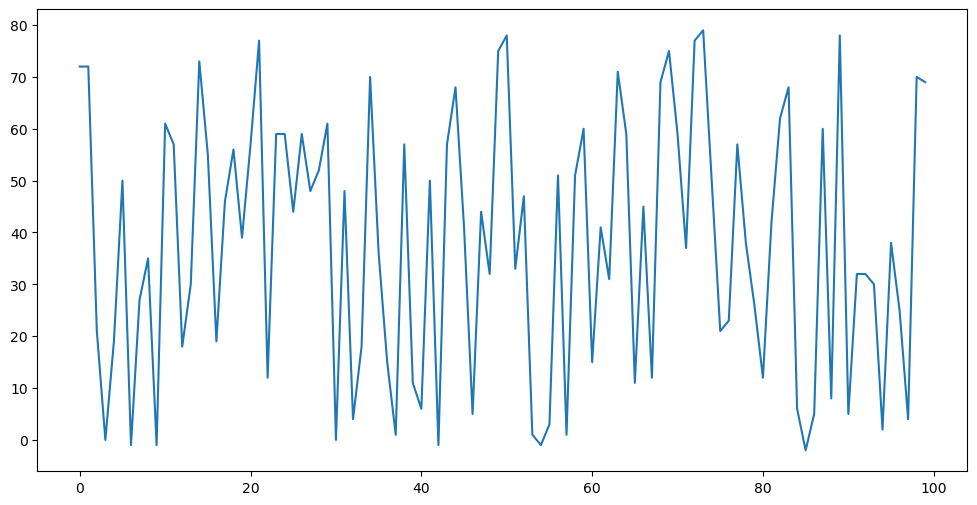

In [20]:
plt.figure(figsize=(12,6))

year = np.arange(0, 100)
profit = np.random.randint(-2, 80, 100)
plt.plot(year, profit)

### Basic Plot Types: Scatter Plot

* Show multiple dimensions (typically two)  of the data
* Each mark is a data instance and is associated with an `x` and `y` value
  * Data points plotted as dots, circles, or other symbols across two axes

* Typically used when:
  * Data represent multiple entities 
  * Values on the x-axis are continuous or discrete but not sparse

* Can include more than two dimensions 
  * Symbols can use different shapes to represent a third, typically categorical variable
  * Symbols can use size or hue to represent a third continuous variable
* More than three is typically not recommended

### Basic Plot Types: Scatter Plot

* Show multiple dimensions (typically two)  of the data
* Each mark is a data instance and is associated with an `x` and `y` value
  * Data points plotted as dots, circles, or other symbols across two axes

* Can include more than two dimensions 
  * Symbols can use different shapes to represent a third, typically categorical variable
  * Symbols can use size or hue to represent a third continuous variable
* More than three is typically not recommended

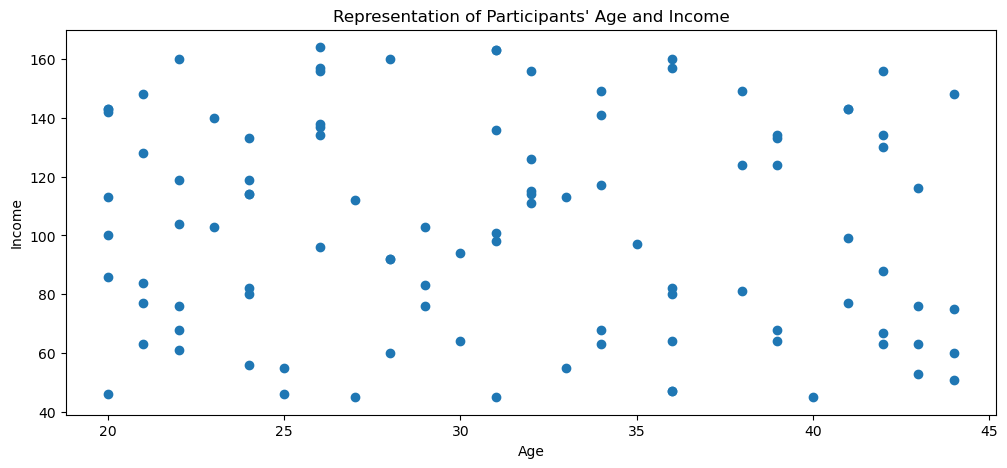

In [21]:
age = np.random.randint(20, 45, 100)
income = np.random.randint(45, 165, 100)

plt.figure(figsize=(12,5))
plt.scatter(age, income)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Representation of Participants\' Age and Income");

NameError: name 'legend_elements' is not defined

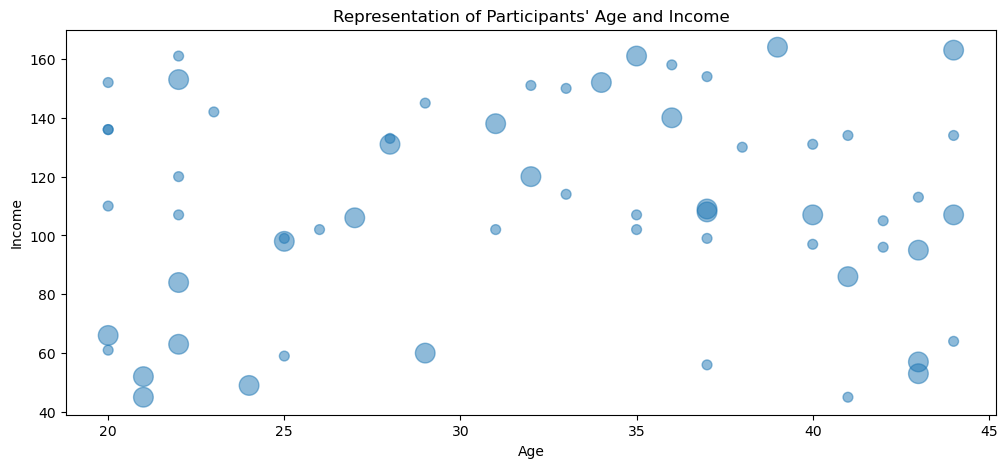

In [22]:
age = np.random.randint(20, 45, 100)
income = np.random.randint(45, 165, 100)
credit_score = np.random.choice([0, 50, 200], 100)

plt.figure(figsize=(12,5))
plt.scatter(age, income, s=credit_score, alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Representation of Participants\' Age and Income");
plt.legend(legend_elements("sizes", num=3))

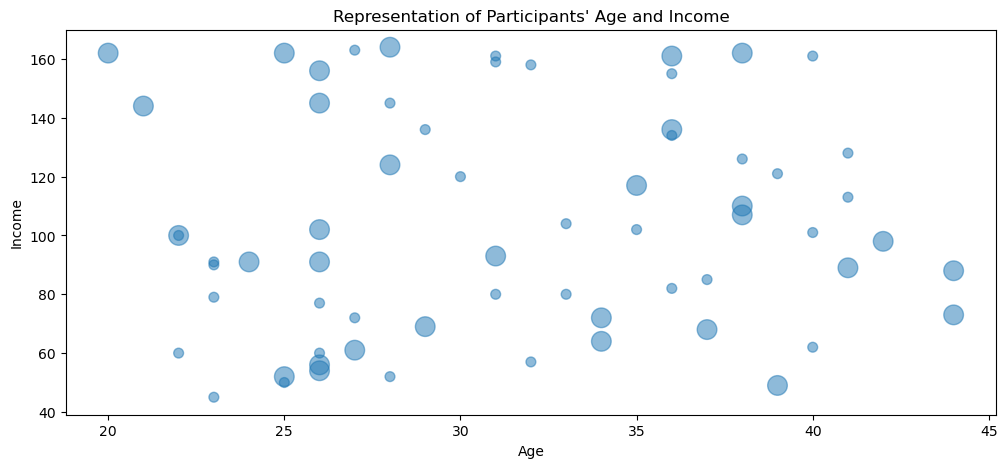

In [23]:
age = np.random.randint(20, 45, 100)
income = np.random.randint(45, 165, 100)
credit_score = np.random.choice([0, 50, 200], 100)

plt.figure(figsize=(12,5))
plt.scatter(age, income, s=credit_score, alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Representation of Participants\' Age and Income");

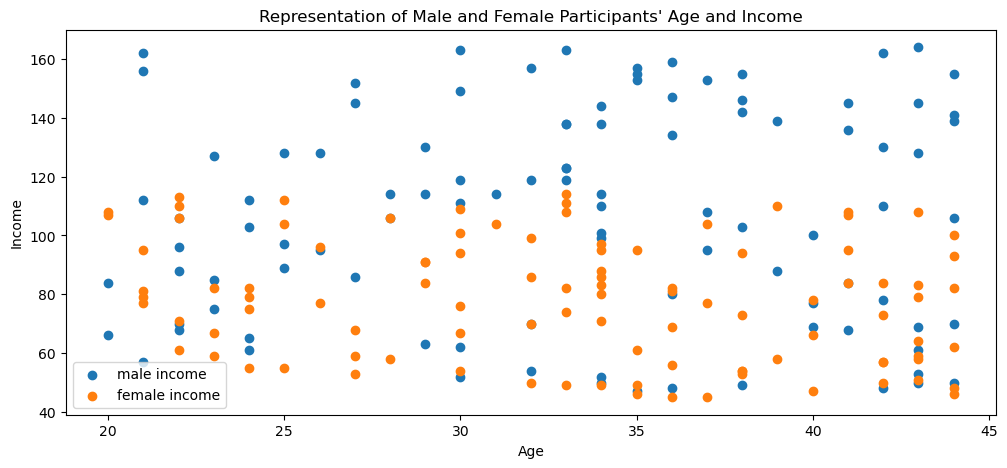

In [24]:
plt.figure(figsize=(12,5))

age = np.random.randint(20, 45, 100)
income_male = np.random.randint(45, 165, 100)
income_female = np.random.randint(45, 115, 100)
plt.scatter(age, income_male, label="male income")
plt.scatter(age, income_female, label="female income")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Income")
_ = plt.title("Representation of Male and Female Participants\' Age and Income")

### Basic Plot Types: Bar Plot

* Shows the relationship between a numeric and a categorical variable
    * Each unique categorical variable is associated with a bar, the length of which represents a numerical value

    * E.g., number of students in ICS, Eng, Phys, Econ, and Math

* Catgorical variable can be further split across factors
  * E.g., number of students in ICS, Eng, Phys, Econ, and Math split by gender
  * Data can be shown side by side, stacked, etc.

<BarContainer object of 5 artists>

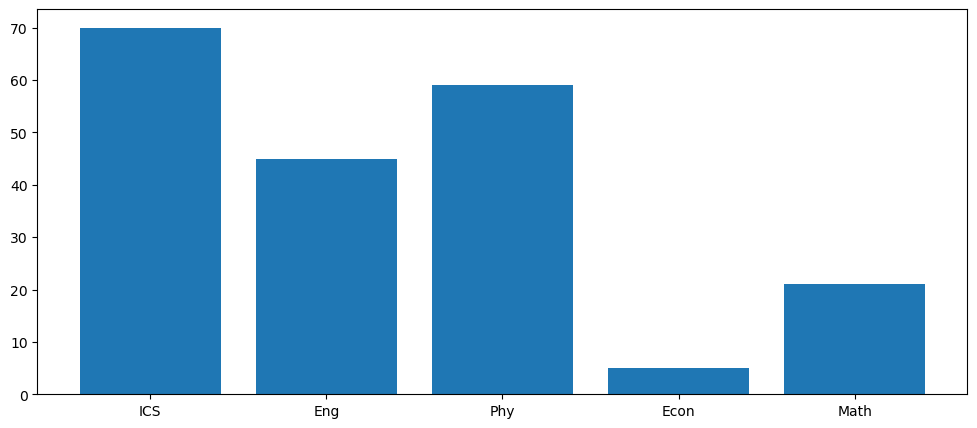

In [25]:
plt.figure(figsize=(12,5))

discipline = ["ICS", "Eng", "Phy", "Econ", "Math"]
nb_students = [70, 45, 59, 5, 21]

plt.bar(discipline, nb_students)

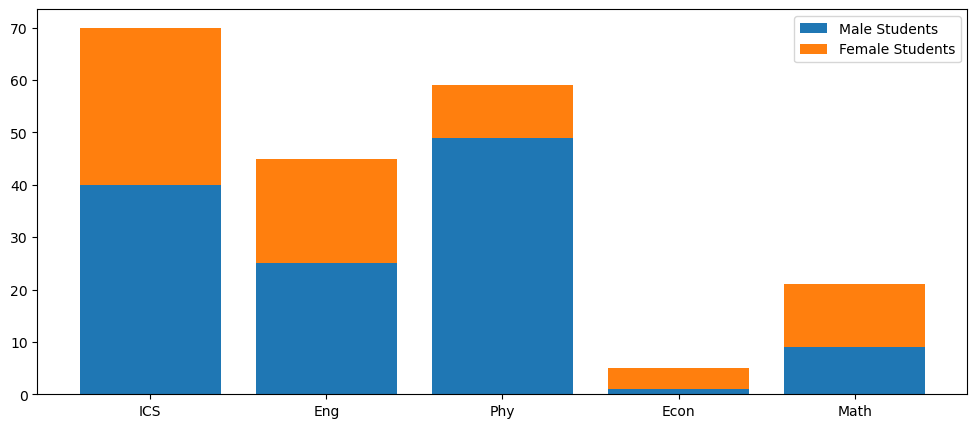

In [26]:
plt.figure(figsize=(12,5))

discipline = ["ICS", "Eng", "Phy", "Econ", "Math"]
nb_male_students = [40, 25, 49, 1, 9]
nb_female_students = [30, 20, 10, 4, 12]

x_values = np.arange(len(discipline))

plt.bar(x_values, nb_male_students, label="Male Students")
plt.bar(x_values, nb_female_students, bottom=nb_male_students, label="Female Students")

plt.xticks(x_values, discipline)
plt.legend();

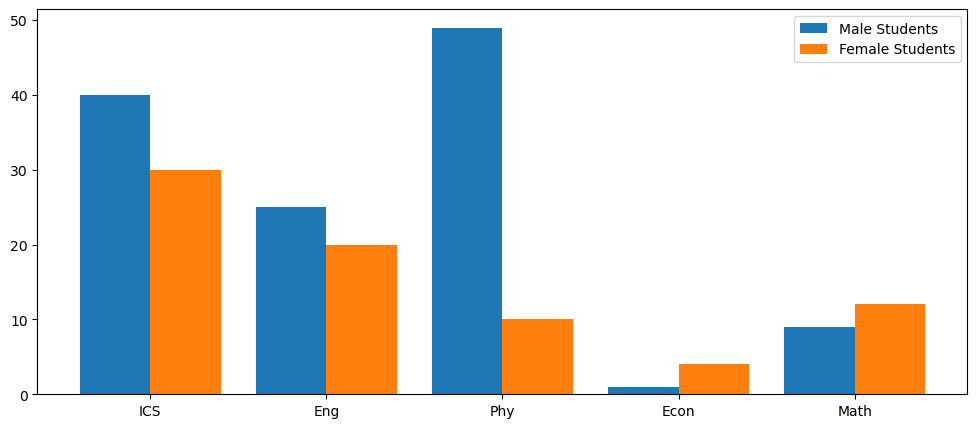

In [27]:
plt.figure(figsize=(12,5))

bar_width = 0.4

discipline = ["ICS", "Eng", "Phy", "Econ", "Math"]
nb_male_students = [40, 25, 49, 1, 9]
nb_female_students = [30, 20, 10, 4, 12]

x_values = np.arange(len(discipline))

plt.bar(x_values - bar_width/2, nb_male_students, width=bar_width, label="Male Students")
plt.bar(x_values + bar_width/2, nb_female_students, width=bar_width, label="Female Students")

plt.xticks(x_values, discipline)
plt.legend();

,nb_mail_students,nb_femail_students
ICS,40,30
Eng,25,20
Phy,49,10
Econ,1,4
Math,9,2


<AxesSubplot: >

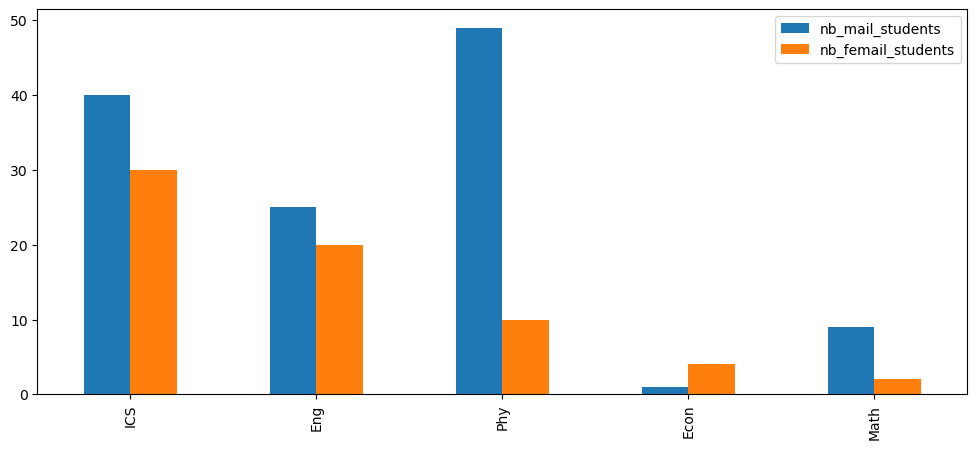

In [28]:
discipline = ["ICS", "Eng", "Phy", "Econ", "Math"]

df = pd.DataFrame({"nb_mail_students": [40, 25, 49, 1, 9],
                   "nb_femail_students": [30, 20, 10, 4, 2]},
                  index=discipline)
display(df)

df.plot.bar(figsize=(12, 5))

<AxesSubplot: >

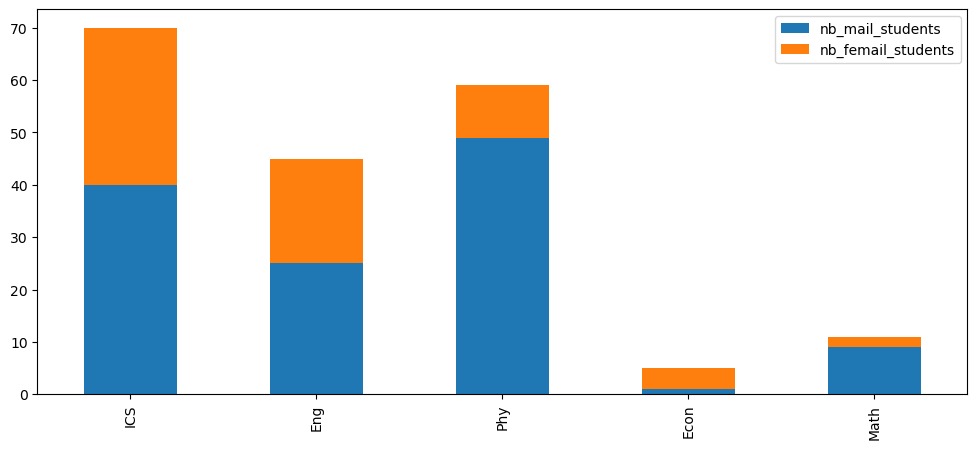

In [29]:
df.plot.bar(stacked=True, figsize=(12, 5))

### Basic Plot Types: Histogram

* A histogram shows the frequency of data within user-defined or automatically determined regions

* Histograms show the `distribution` of the data
  * The frequency (a proxy for probability) of different x-values
    
* Used when:
  * Data is `unidimensional`   
  * Interested in showing the distribution of frequencies across bins


(array([100., 108.,  99., 109.,  95., 100.,  88.,  92., 100., 109.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

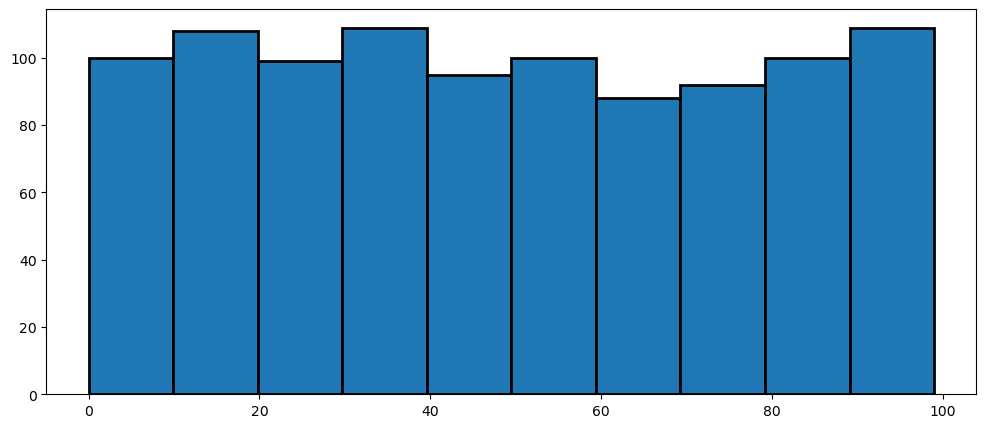

In [30]:
plt.figure(figsize=(12,5))

data = np.random.randint(0, 100, 1000)

plt.hist(data, edgecolor='black', linewidth=2)

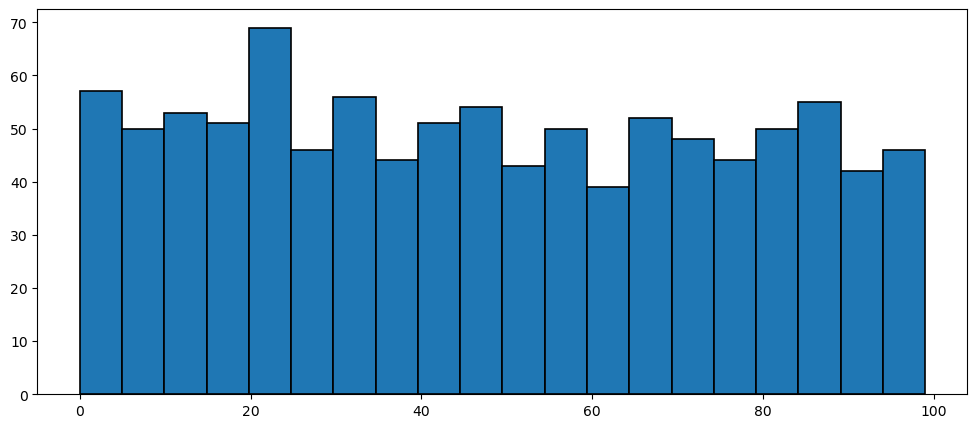

In [31]:
plt.figure(figsize=(12,5))

data = np.random.randint(0, 100, 1000)

_ = plt.hist(data, bins = 20, edgecolor='black', linewidth=1.2)

(array([57., 50., 53., 51., 69., 46., 56., 44., 51., 54., 43., 50., 39.,
        52., 48., 44., 50., 55., 42., 46.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <BarContainer object of 20 artists>)

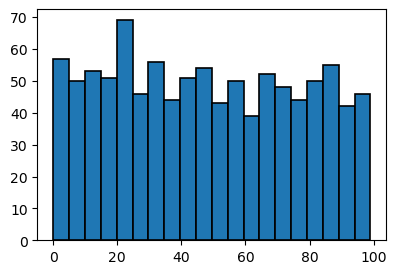

In [32]:
plt.hist(data, bins=20, edgecolor='black', linewidth=1.2)